In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft,dct
import librosa
from scipy import signal
import soundfile as sf

### 1. Mel filterbank (1 point)

#### a) Load the given audio file

In [2]:
s, sr = librosa.load('audio.wav', sr=None)


#### b) Create a mel filterbank using librosa

In [3]:
# sr already obtained from a)
n_fft = 512
n_mel = 40
melfb = librosa.filters.mel(sr=sr, n_fft=n_fft, n_mels=n_mel)

#### c) Plot the mel filterbank

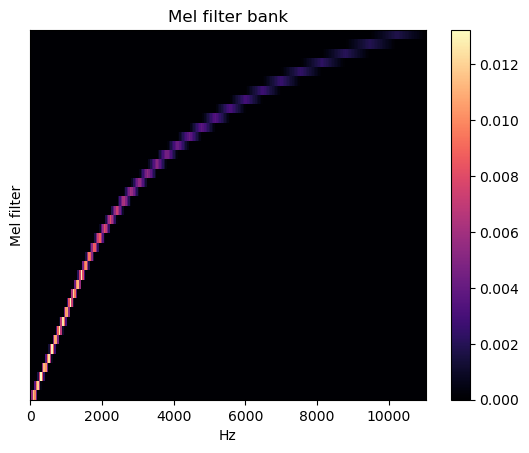

In [4]:
fig, ax = plt.subplots()

img = librosa.display.specshow(melfb, x_axis='linear', ax=ax)

ax.set(ylabel='Mel filter', title='Mel filter bank')

fig.colorbar(img, ax=ax)

#### Report your observations

The mel filterbank frequency scale grows logarithmically in relation to the frequency in hz.
The intensity is higher as the frequency lowers.

### 2. MFCC (1 point)

#### a) Pre-emphasis the audio signal

In [5]:
pre_emphasis = 0.97
s_ = np.append(s[0], s[1:] - pre_emphasis * s[:-1])

#### b) Implement a stft loop for each frame 

In [38]:
n_frames = len(s_) // n_fft
window = signal.windows.hamming(n_fft)

mfccs = np.zeros((40, n_frames), dtype=np.float32)
mel_spectro = np.zeros((n_mel, n_frames))
log_mel_spectro = np.zeros((n_mel, n_frames))
power_spectro = np.zeros((n_fft//2+1, n_frames))

for i in range(n_frames):
    start = i * n_fft
    end = start + n_fft
    s_seg = s_[start:end] # Extract each frame
    if len(s_seg) < n_fft:
        break
    s_win_seg = s_seg * window # Window each frame using hamming window
    spectrum = fft(s_win_seg) # Calculate fft
    spectrum = np.abs(spectrum[:n_fft//2+1])**2 # Collect the power spectrum
    power_spectro[:, i] = spectrum # Store the power spectrum
    mel_spectrum = np.dot(melfb, spectrum) # Multiply it with the mel filterbank
    log_mel_spectrum = 20 * np.log10(mel_spectrum + 1e-10) # Take log operation
    mel_spectro[:, i] = mel_spectrum # Store the log mel spectrum
    log_mel_spectro[:, i] = log_mel_spectrum # Store the log mel spectrum
    mfcc = dct(log_mel_spectrum, type=2, axis=0, norm='ortho')[:40] # Take DCT and keep 40 coefficients
    mfccs[:, i] = mfcc # Store the MFCCs
    

 

#### c.1) Plot logarithmic power spectrogram

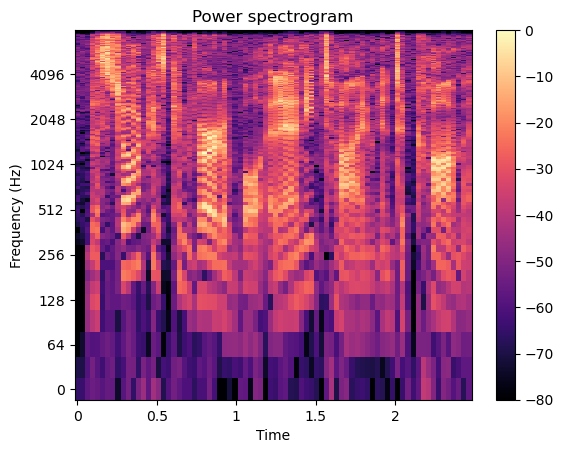

In [39]:
# Plot logarithmic power spectrogram using librosa
fig, ax = plt.subplots()
S_dB = librosa.power_to_db(power_spectro, ref=np.max)
img = librosa.display.specshow(S_dB, sr=sr, x_axis='time', y_axis='log', ax=ax)
ax.set(ylabel='Frequency (Hz)', title='Power spectrogram')
fig.colorbar(img, ax=ax)


#### c.2) Plot mel spectrogram

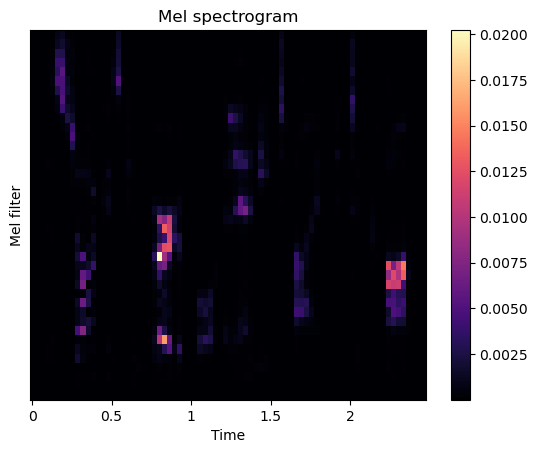

In [40]:
# Plot mel spectrogram using
fig, ax = plt.subplots()
img = librosa.display.specshow(mel_spectro, x_axis='time', sr=sr, hop_length=n_fft, ax=ax)
ax.set(ylabel='Mel filter', title='Mel spectrogram')
fig.colorbar(img, ax=ax)


#### c.3) Plot logarithmic mel spectrogram

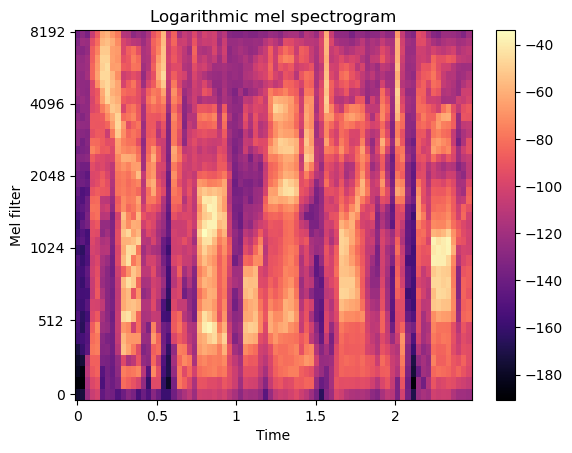

In [ ]:
# Plot logarithmic mel spectrogram using librosa
fig, ax = plt.subplots()
img = librosa.display.specshow(log_mel_spectro, sr=sr, x_axis='time', y_axis='mel', ax=ax)
ax.set(ylabel='Mel filter', title='Logarithmic mel spectrogram')
fig.colorbar(img, ax=ax)

#### c.4) Plot MFCC

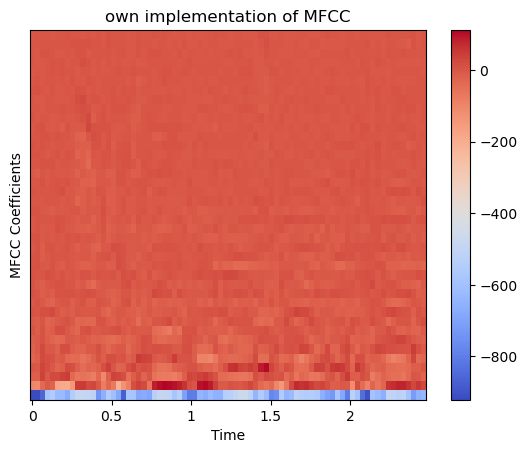

In [43]:
# Plot mfcc using librosa
fig, ax = plt.subplots()
img = librosa.display.specshow(mfccs, x_axis='time', sr=sr, hop_length=n_fft, ax=ax)
ax.set(ylabel='MFCC Coefficients', title='own implementation of MFCC')
fig.colorbar(img, ax=ax)


#### d) Implement MFCC using librosa

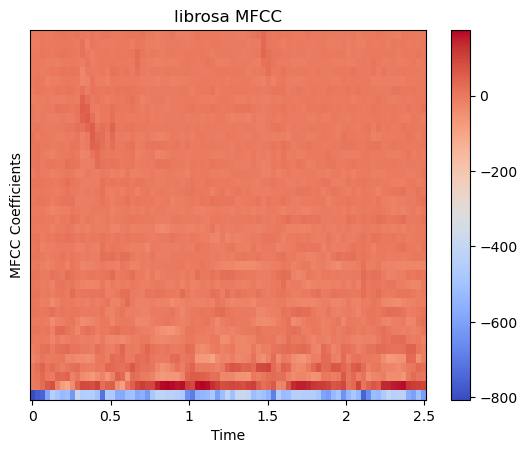

In [44]:
# Create mfcc from audio signal using librosa
mfccs = librosa.feature.mfcc(y=s, sr=sr, n_mfcc=40, n_fft=n_fft, hop_length=n_fft, window='hamming')
mfccs = mfccs.T
# Plot mfcc using librosa
fig, ax = plt.subplots()
img = librosa.display.specshow(mfccs.T, x_axis='time', sr=sr, hop_length=n_fft, ax=ax)
ax.set(ylabel='MFCC Coefficients', title='librosa MFCC')
fig.colorbar(img, ax=ax)



#### Report your observations

The spectrograms look quite similar, but there are subtle differences.
On average, my own implementation seems to have more intensity across the board.
The librosa MFCC spectrogram seems to have captured details better than my own implementation.

### Bonus problem: Implement your own mel filterbank.